## Fisrt-Visit MC Prediction with Incremental Implementation

练习 5.9 

$$
    V_{t+1}(s) = V_{t}(s) + \frac{1}{t+1} ( G_{t+1} - V_{t}(s)   )
$$

In [5]:
%matplotlib inline
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")
    
import numpy as np
from lib.envs.blackjack import BlackjackEnv
from lib.utils.draw import show_value_function
import matplotlib

matplotlib.style.use('ggplot')
env = BlackjackEnv()

In [6]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [7]:
def mc_prediction(policy, env, num_episodes, gamma=1.0):
    # defaultdict(float)
    # float -> 确实的键自动赋值 0.0
    # 一种字典子类，它允许指定一个默认的工厂函数来为字典的缺失键提供默认值。
    
    
    V = defaultdict(float)
    V_count = defaultdict(float)
    
    for i_episode in range(num_episodes):
        
        if i_episode % 1000 == 0:
            # \r 实现动态更新
            print(f"\rEpisode :{i_episode}/{num_episodes}",end = "")
            sys.stdout.flush()
        
        stack_state = []
        stack_reward = []
        state = env.reset()
        #
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            stack_state.append(state)
            stack_reward.append(reward)
            if done:
                break
            state = next_state
        
        size = len(stack_state)
        G = 0
        for i in range(size-1,-1,-1):
            key = tuple(stack_state[i])
            G = gamma * G + stack_reward[i]
            
            if stack_state[i] not in stack_state[0:i]:
                # increment implementation
                V_count[key] += 1
                V[key] = V[key] + 1/V_count[key] * ( G - V[key] )
        
    return V
        
        

Episode :9000/10000

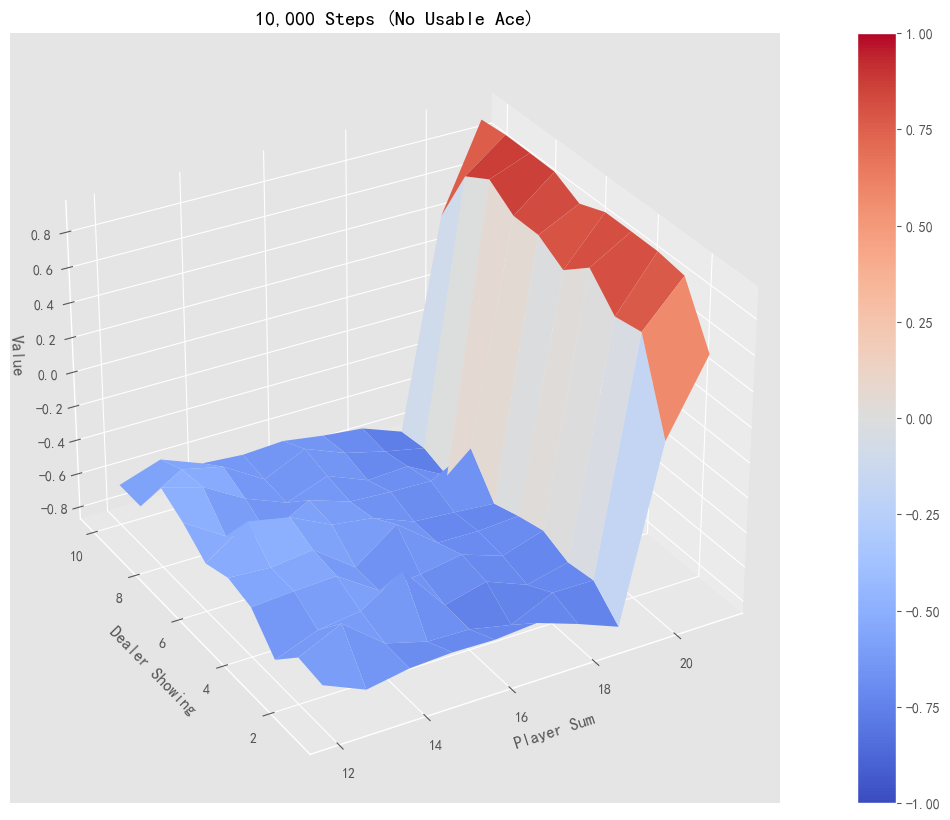

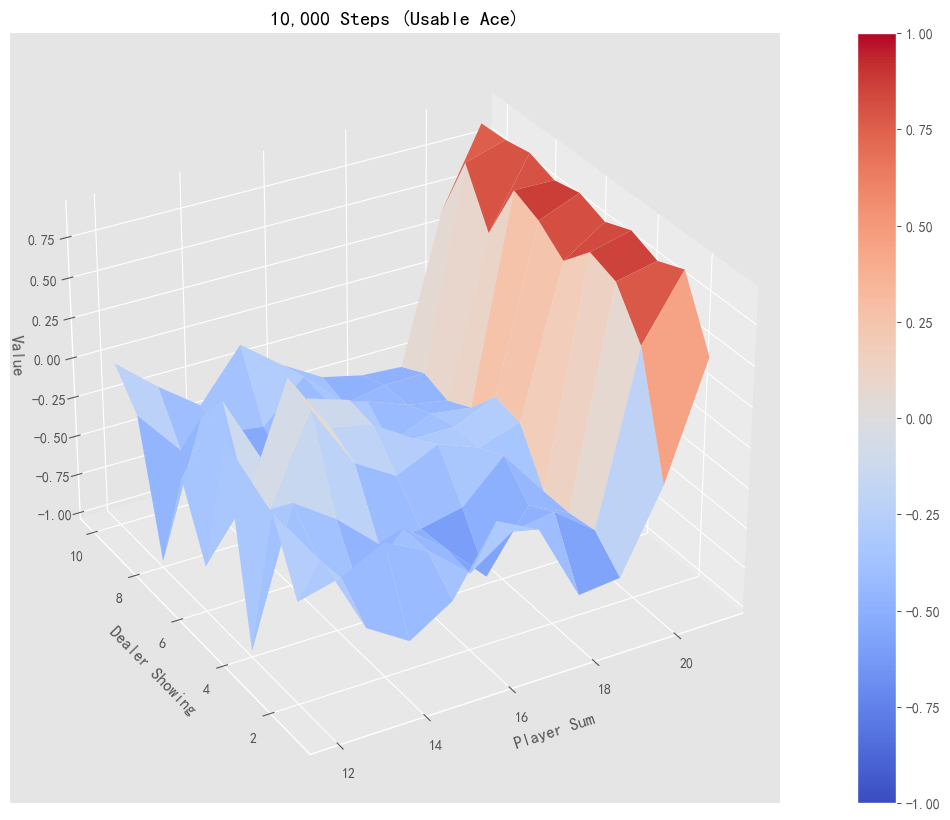

In [8]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)

show_value_function(V_10k, title="10,000 Steps")